# Project Title: Telecommunications Churn

Use case:This project is focused on predicting whether customers of a telecom company are likely to leave (churn) based on their usage patterns, plan details, and interactions with customer service. By identifying these at-risk customers, the company can take proactive steps like offering discounts, improving service, or customizing plans to encourage them to stay. This helps reduce customer loss, save money on acquiring new customers, and improve overall customer satisfaction. The insights from this project also help the company design better plans, fix problems like high charges or poor support, and build stronger relationships with its customers.

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Load the Data Set 
df=pd.read_csv('telecommunications_churn.csv')
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [3]:
#Preview the data
df.shape

(3333, 19)

In [4]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [6]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [7]:
#Understand the data types to identify numerical and categorical features.
df.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [8]:
#Summary Statistics
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


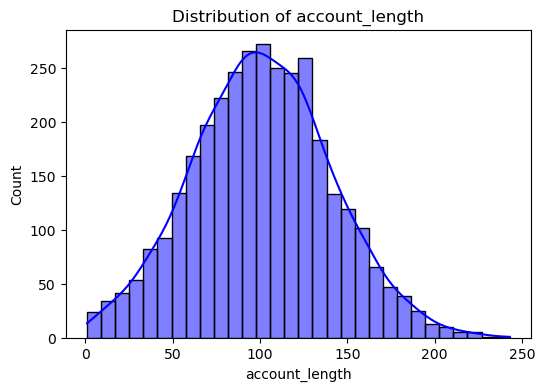

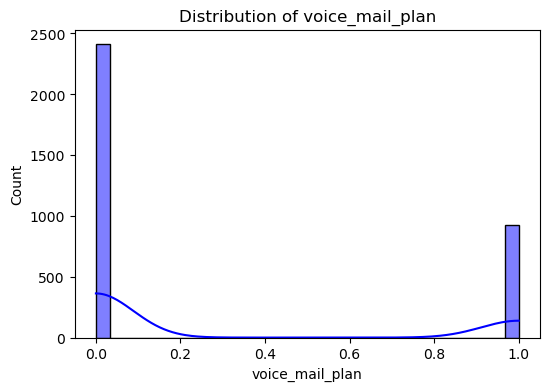

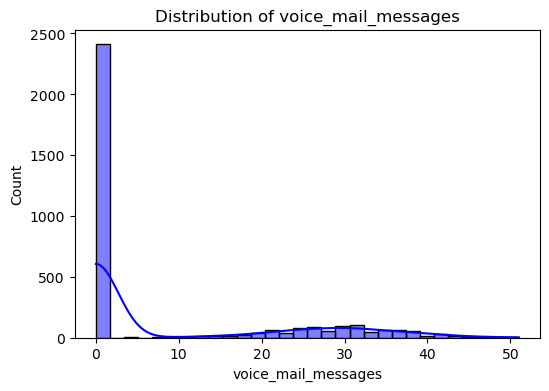

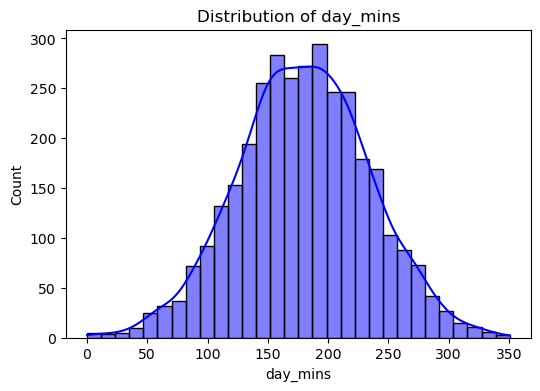

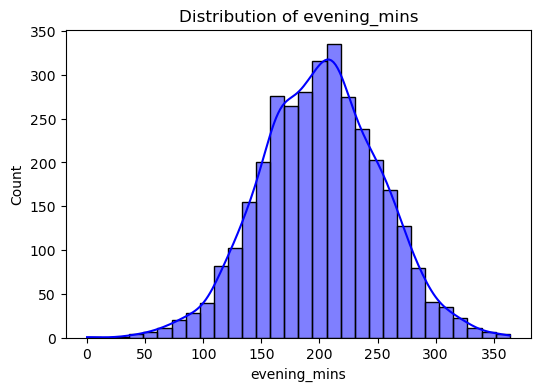

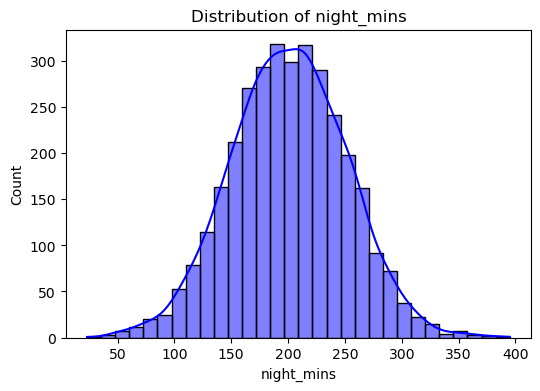

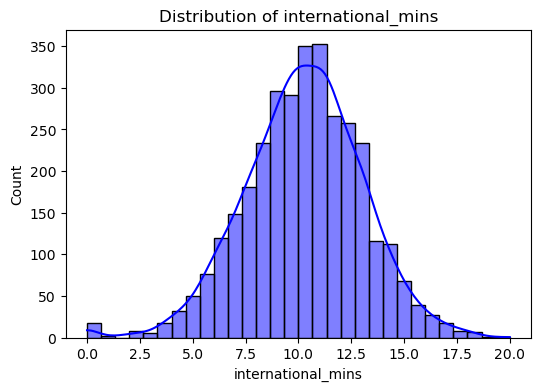

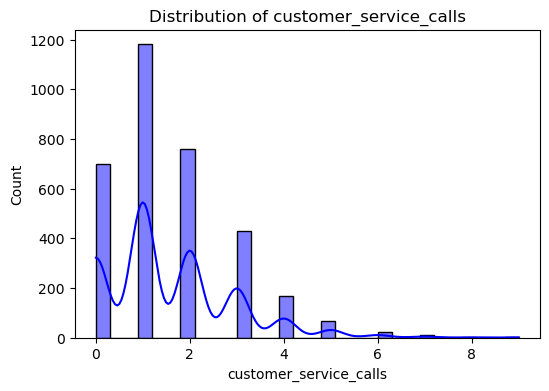

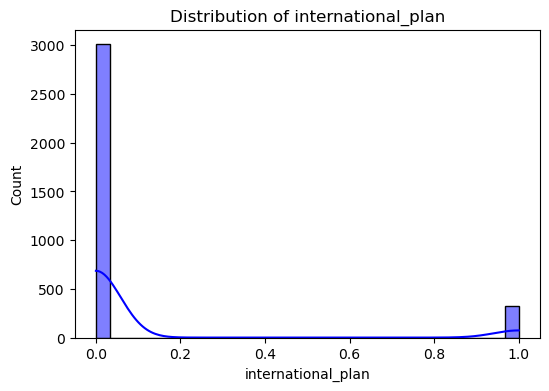

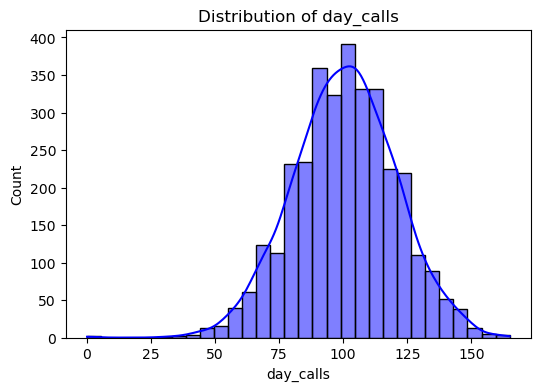

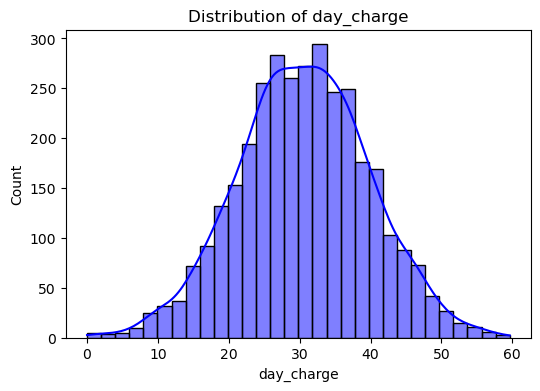

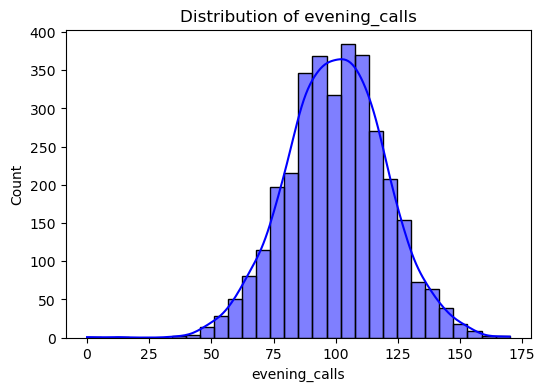

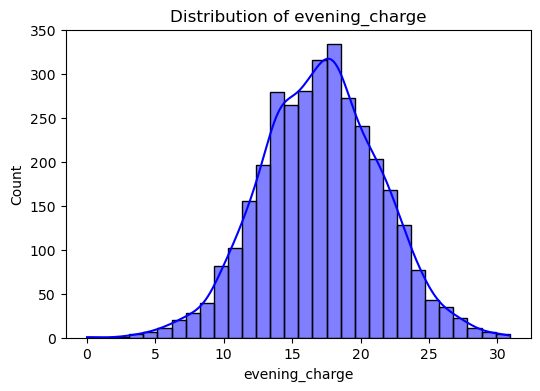

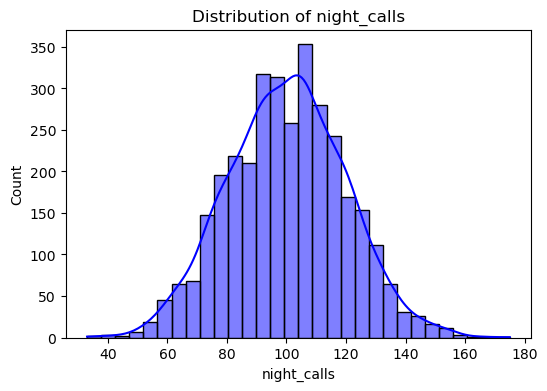

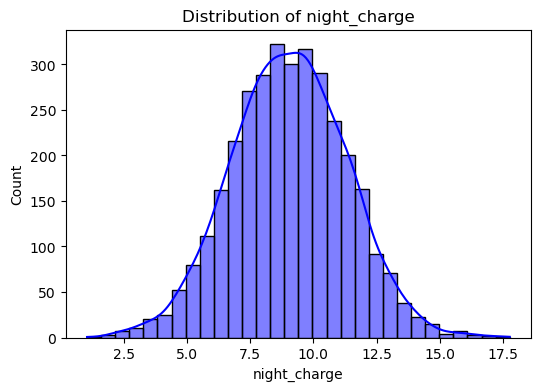

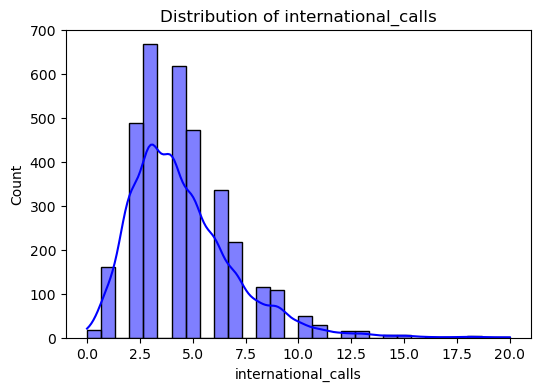

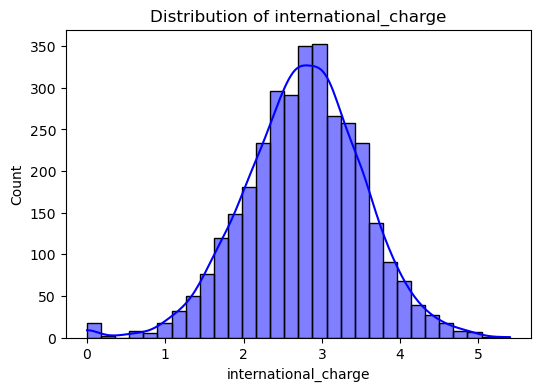

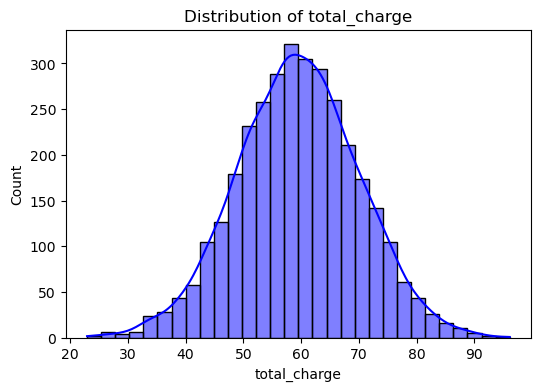

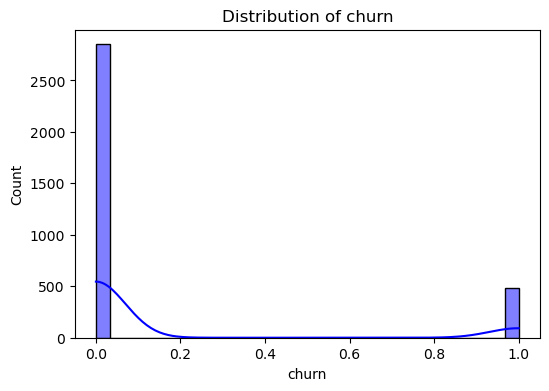

In [9]:
#Univariate Analysis
# Plot distributions for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

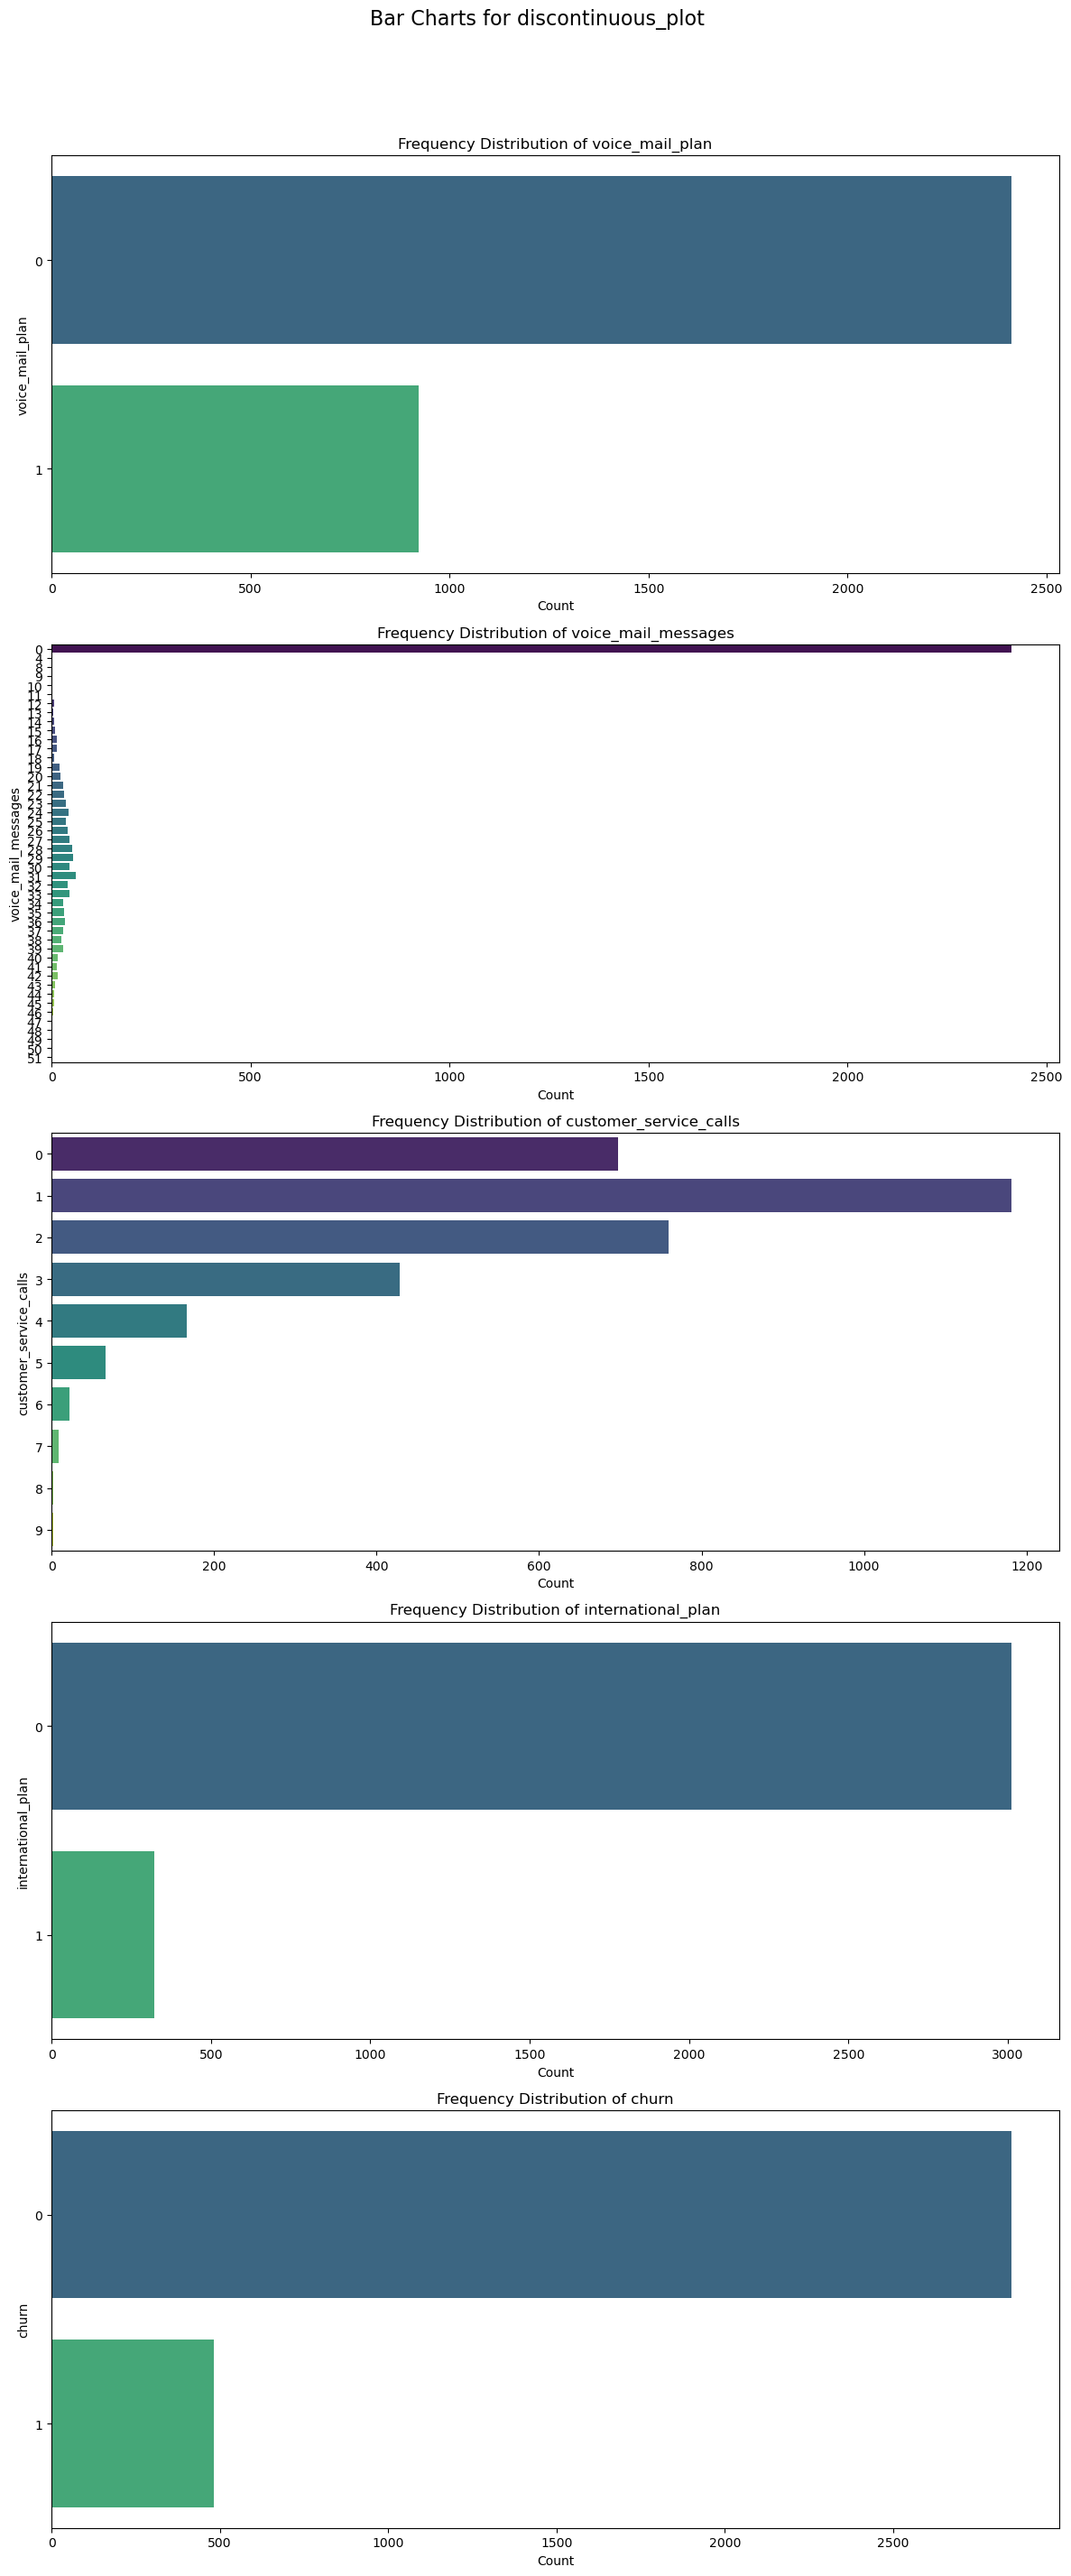

In [10]:
#Bar Charts
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
discontinuous_plot = ['voice_mail_plan','voice_mail_messages','customer_service_calls', 'international_plan', 'churn']
fig, axes = plt.subplots(len(discontinuous_plot), 1, figsize=(12, 6 * len(discontinuous_plot)))
fig.suptitle("Bar Charts for discontinuous_plot", fontsize=16)

for ax, col in zip(axes, discontinuous_plot):
    sns.countplot(y=col, data=df, ax=ax,palette="viridis")
    ax.set_title(f'Frequency Distribution of {col}')
    ax.set_xlabel("Count")
    ax.set_ylabel(col)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


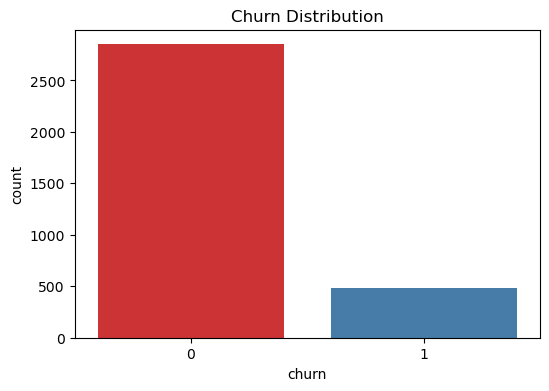

In [11]:
# Analyze target variable (churn)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6, 4))
sns.countplot(x=df['churn'], palette='Set1')
plt.title('Churn Distribution')
plt.show()

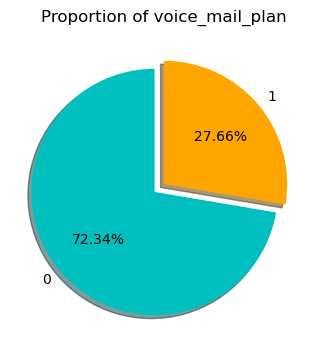

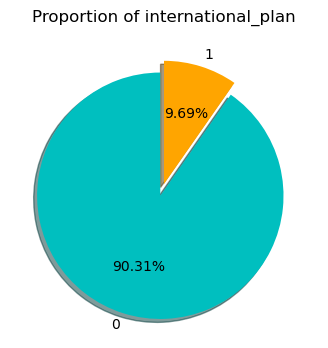

In [12]:
# PIE CHART

categorical_features = ['voice_mail_plan', 'international_plan']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    e=[0.1,0]
    colors=['c','orange']
    df[col].value_counts().plot.pie(autopct='%2.2f%%', startangle=90, cmap='Set3',shadow=True,explode=e,colors=colors)
    plt.title(f"Proportion of {col}")
    plt.ylabel('')
    plt.show()

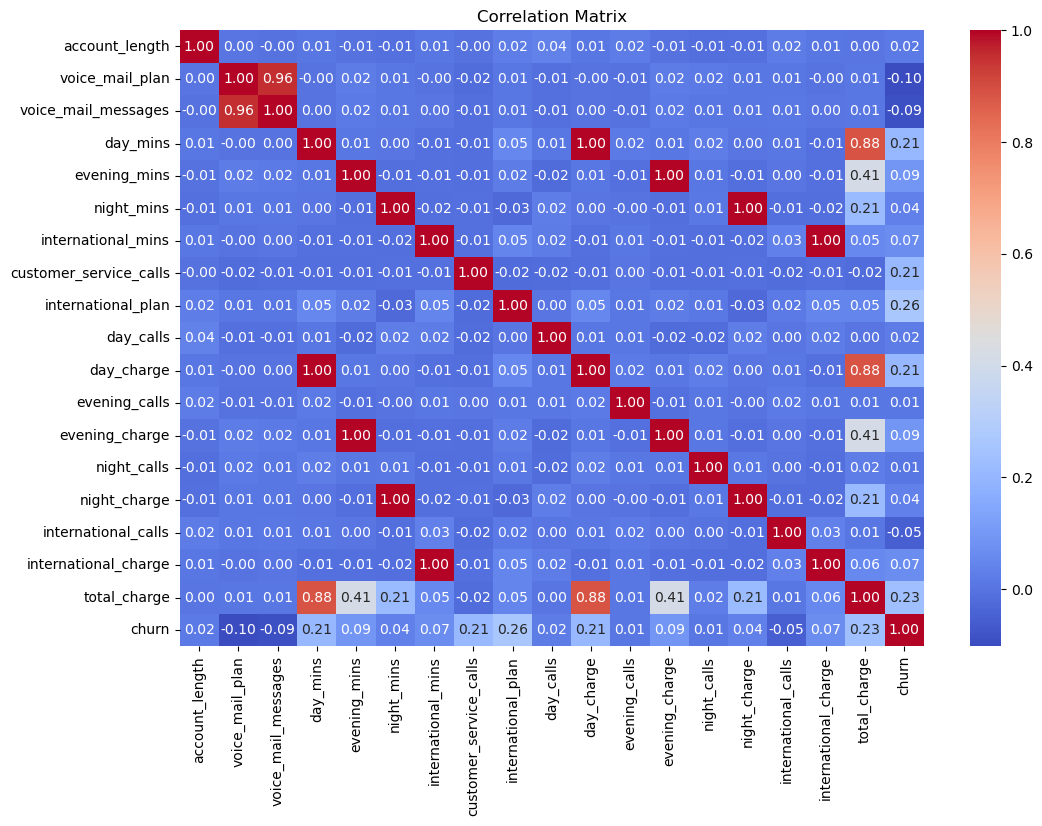

In [13]:
#Bivariate Analysis
# Correlation analysis
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


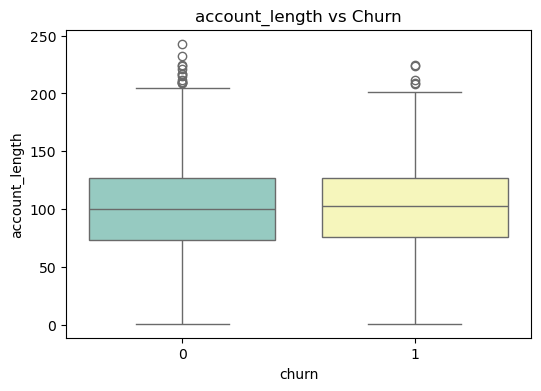

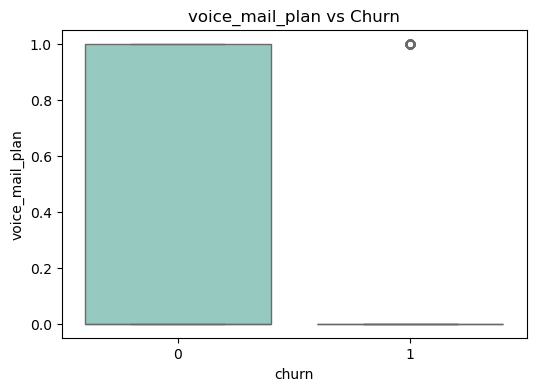

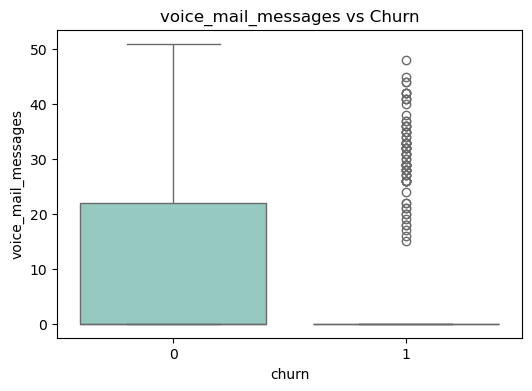

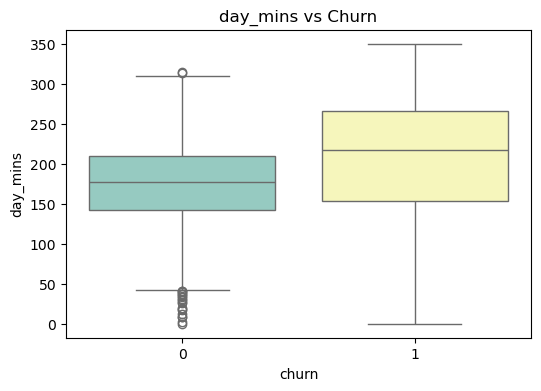

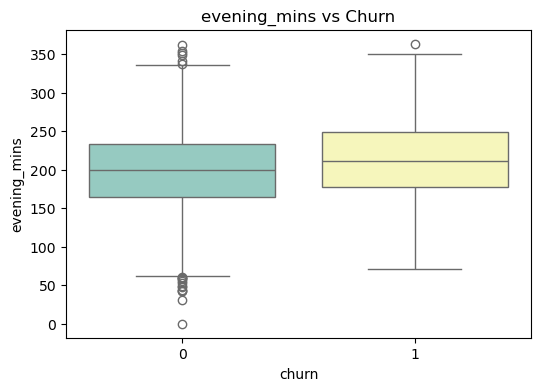

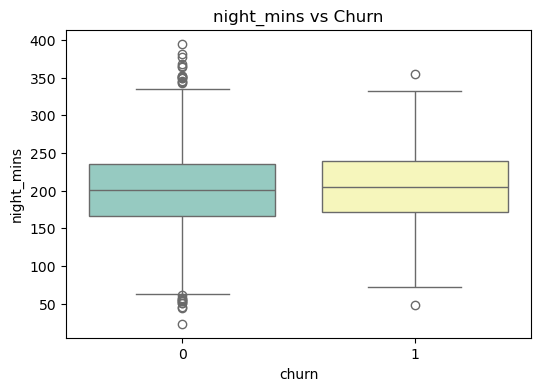

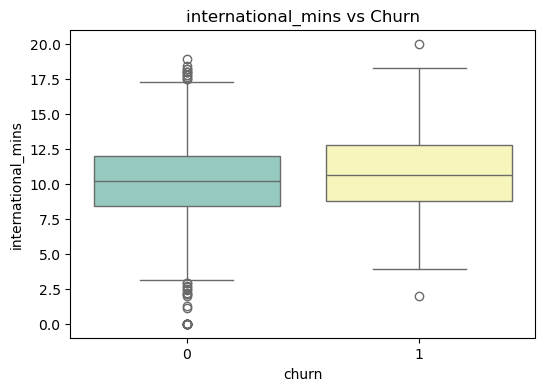

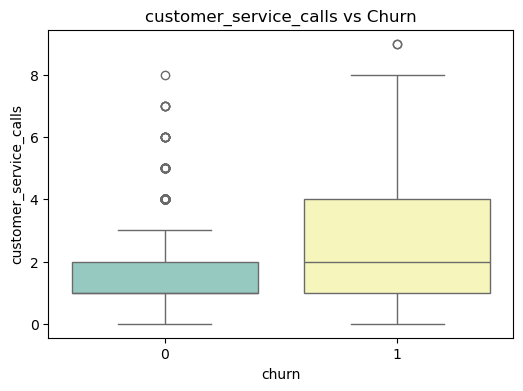

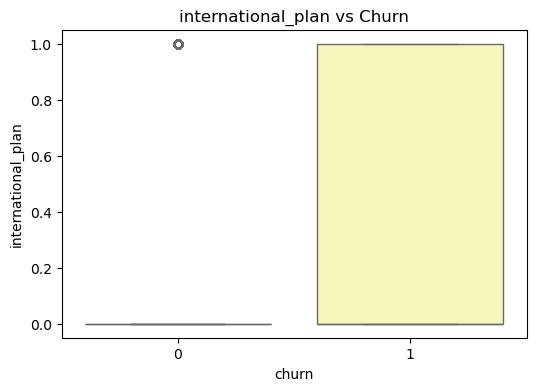

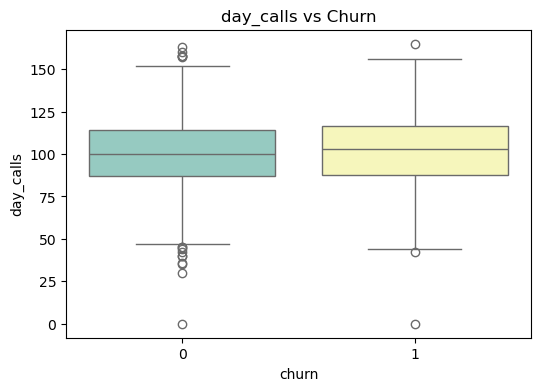

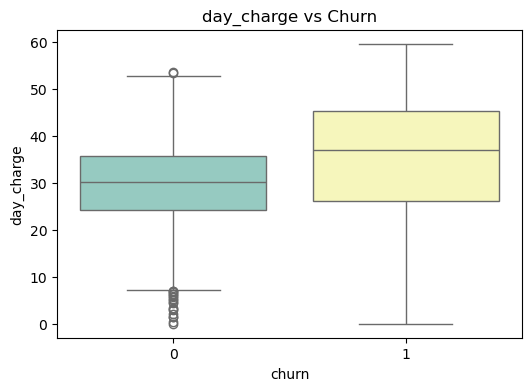

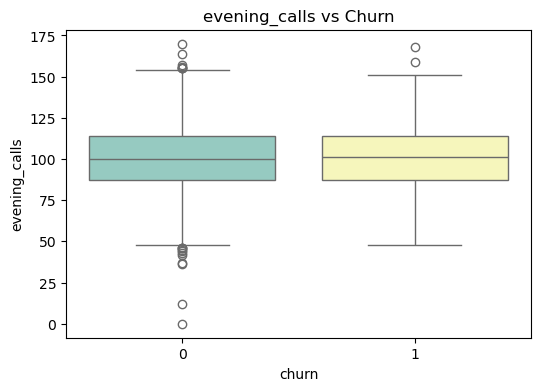

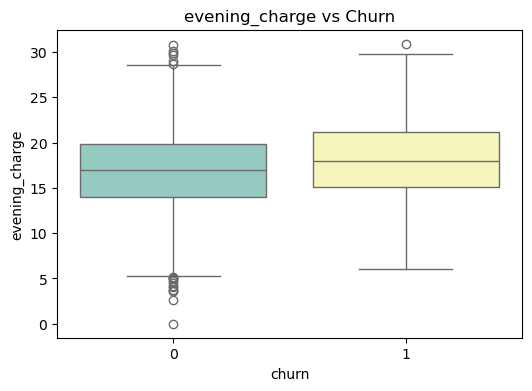

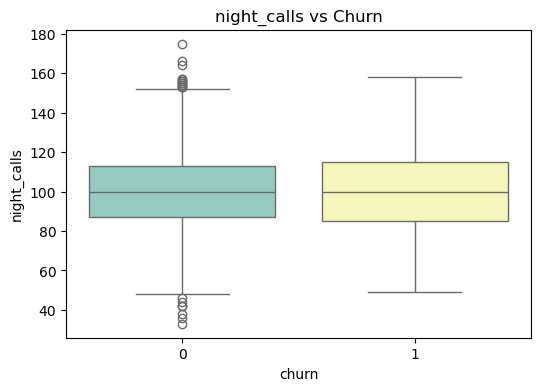

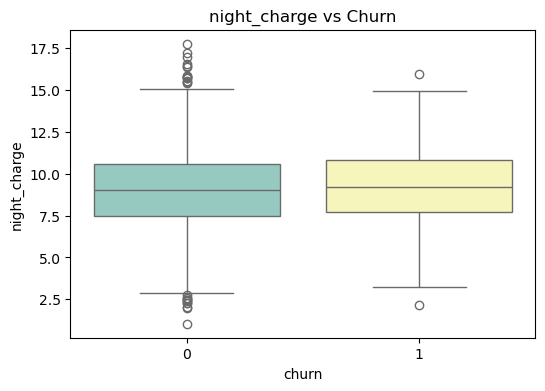

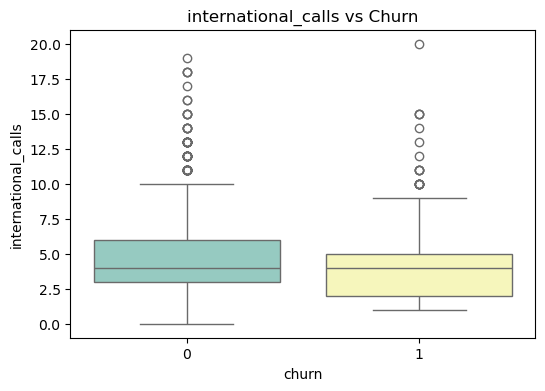

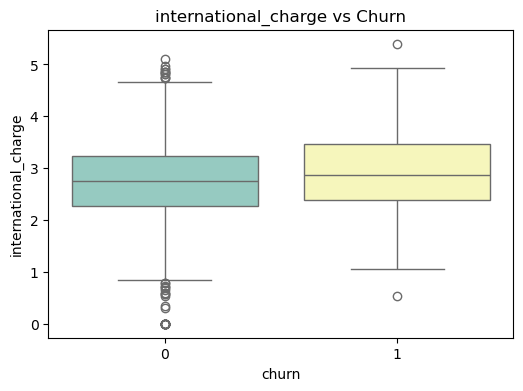

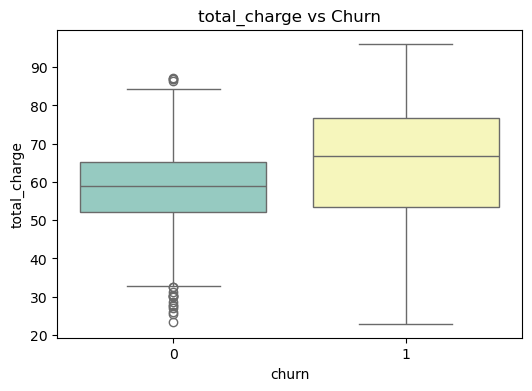

In [14]:
# Explore relationships between features and the target variable Churn
for feature in numerical_features:
    if feature != 'churn':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df['churn'], y=df[feature], palette='Set3')
        plt.title(f'{feature} vs Churn')
        plt.show()


In [15]:
#Feature Engineering
# Example: Creating a new feature for total minutes and total charges
df['total_minutes'] = df['day_mins'] + df['evening_mins'] + df['night_mins'] + df['international_mins']
df['total_charge'] = df['day_charge'] + df['evening_charge'] + df['night_charge'] + df['international_charge']


In [16]:
#To create new features that might better capture customer behavior.
#total_minutes combines all minutes used, and total_charge combines all charges.
df['total_minutes']

0       717.2
1       625.2
2       539.4
3       564.8
4       512.0
        ...  
3328    660.7
3329    585.4
3330    675.6
3331    517.6
3332    755.4
Name: total_minutes, Length: 3333, dtype: float64

In [17]:
df['total_charge'] 

0       75.56
1       59.24
2       62.29
3       66.80
4       52.09
        ...  
3328    60.10
3329    63.53
3330    67.74
3331    57.53
3332    77.01
Name: total_charge, Length: 3333, dtype: float64

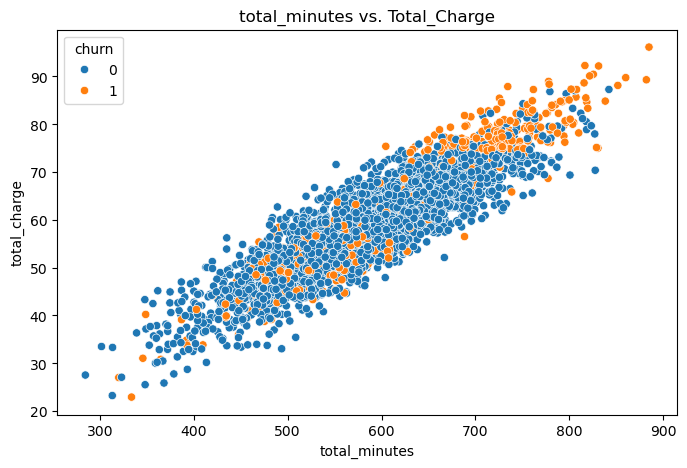

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_minutes', y='total_charge', hue='churn', data=df)
plt.title('total_minutes vs. Total_Charge')
plt.show()


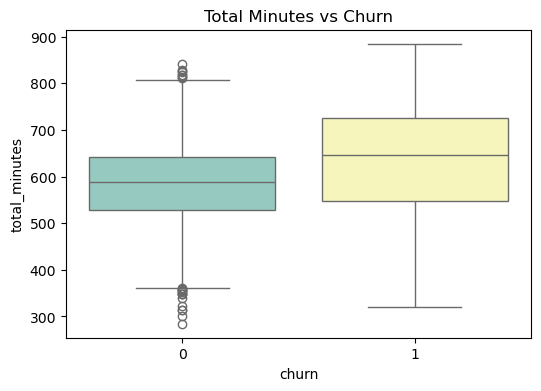

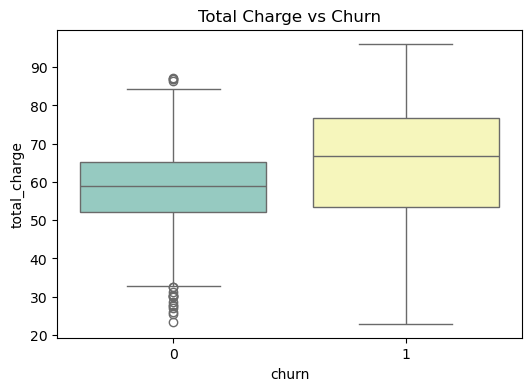

In [19]:
# Analyze the new feature
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['churn'], y=df['total_minutes'], palette='Set3')
plt.title('Total Minutes vs Churn')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['churn'], y=df['total_charge'], palette='Set3')
plt.title('Total Charge vs Churn')
plt.show()


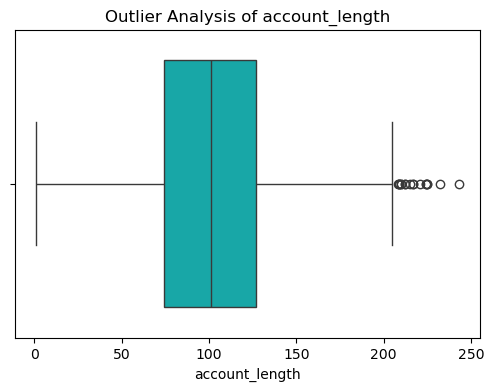

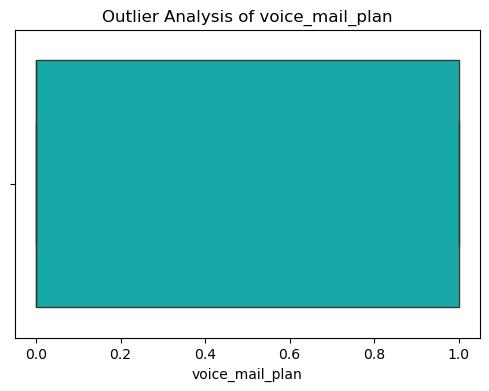

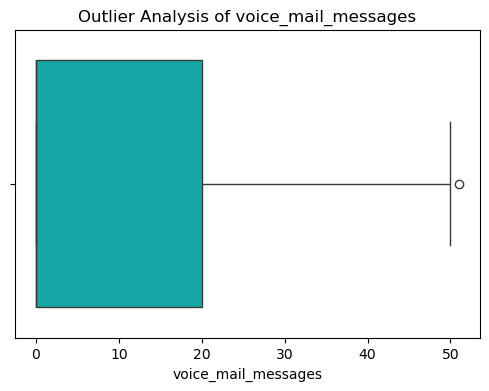

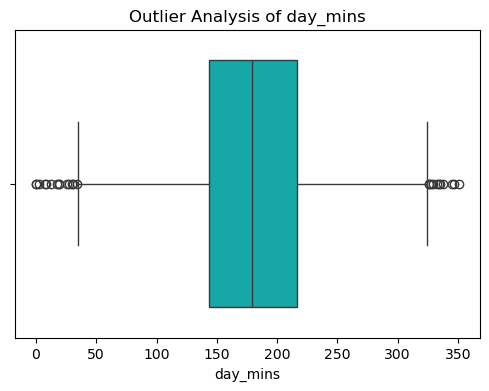

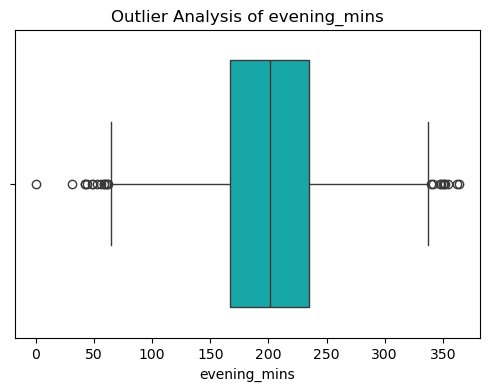

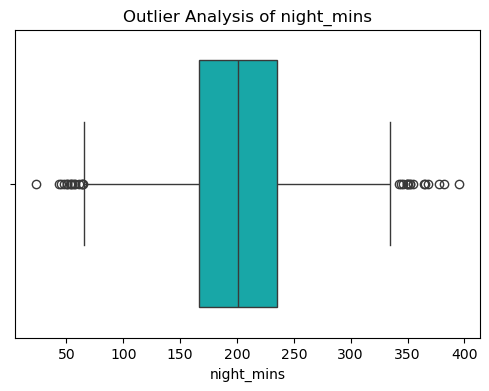

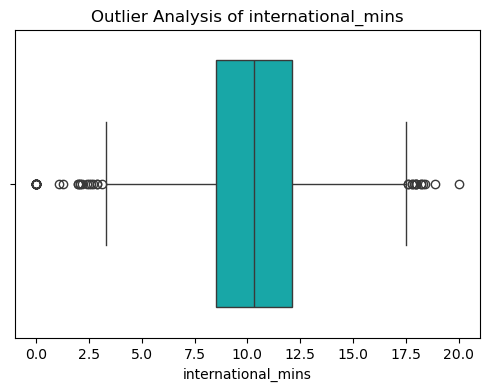

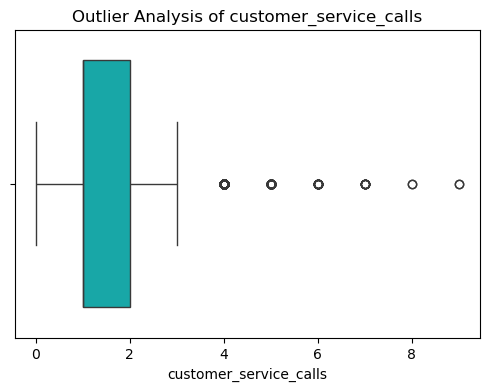

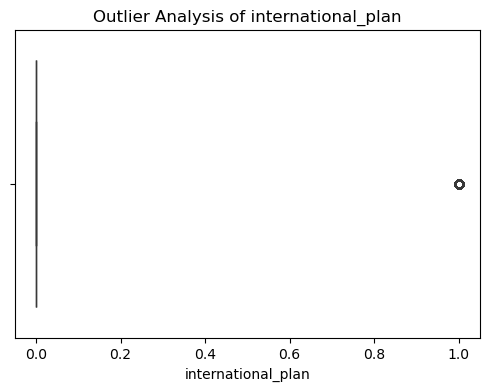

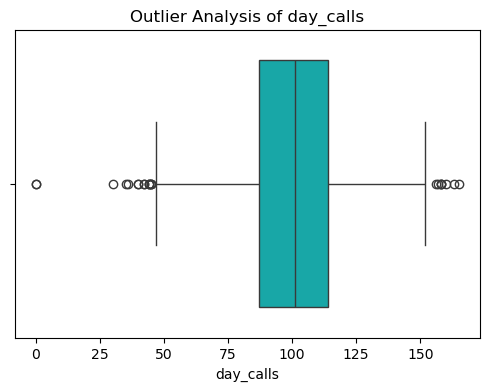

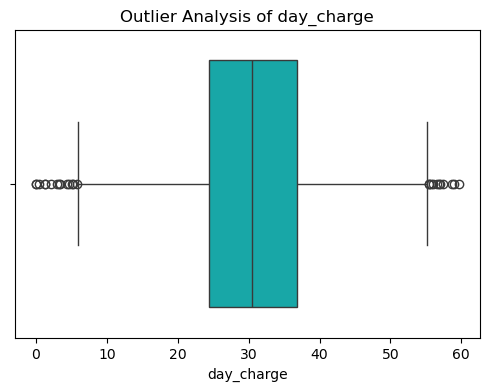

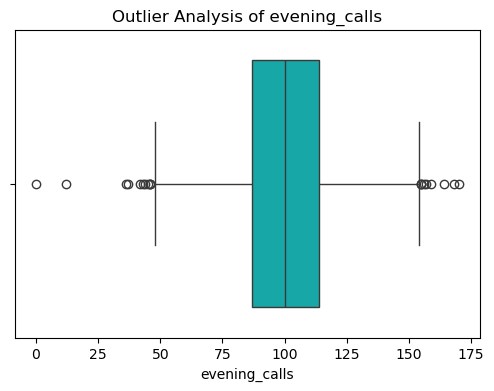

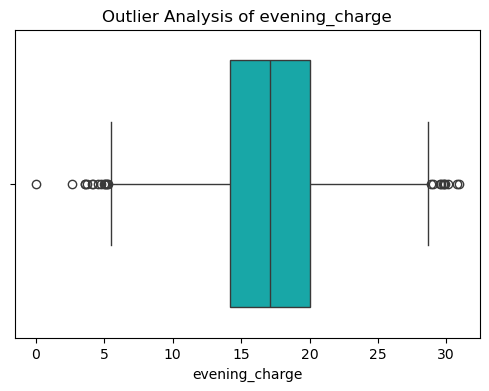

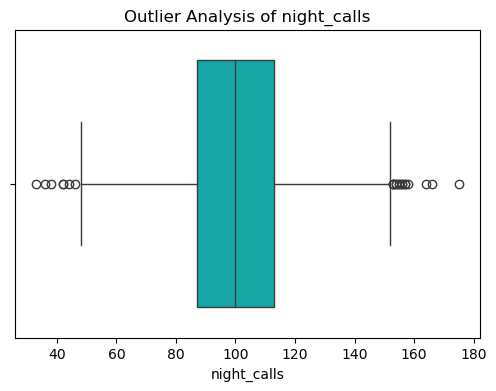

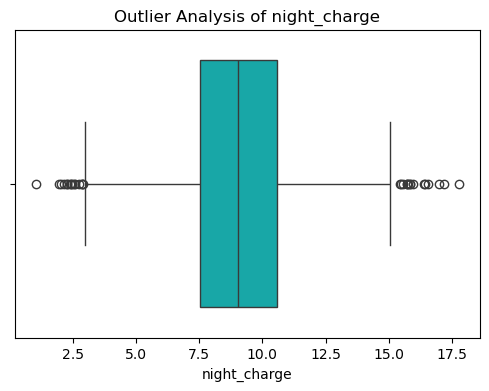

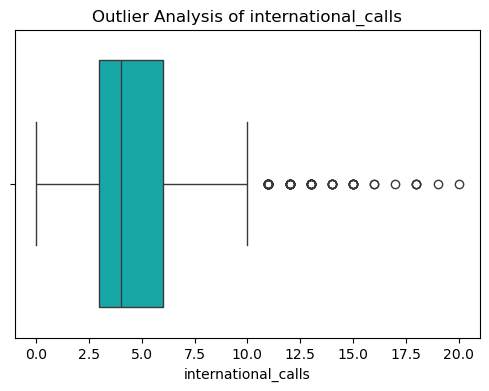

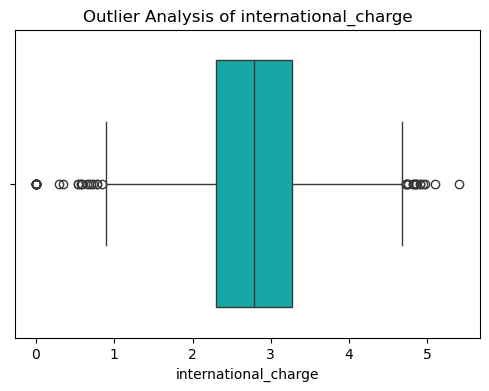

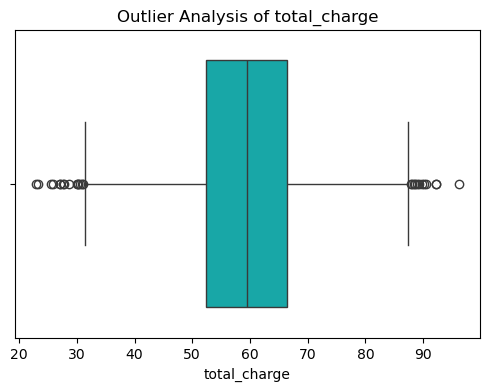

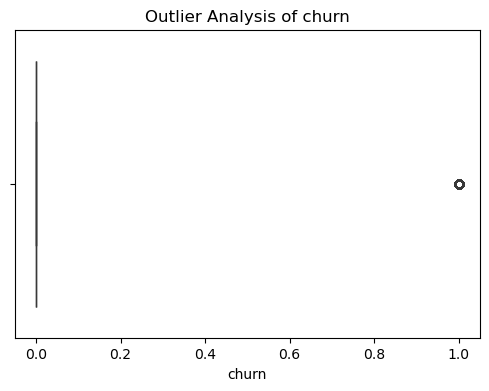

In [20]:
#Outlier Detection
#Data points outside the whiskers of the boxplot are considered outliers.
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='c')
    plt.title(f'Outlier Analysis of {feature}')
    plt.show()


# Model Building


In [21]:
# LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Standardizing column names to avoid case or space issues
df.columns = df.columns.str.strip().str.lower()

# Ensuring the target column exists and is correctly identified
target_column = 'churn'
if target_column not in df.columns:
    raise ValueError("Target column 'churn' not found in the dataset")

# Check unique values in Churn column
unique_classes = df[target_column].nunique()
if unique_classes < 2:
    raise ValueError("Dataset must contain at least two classes for classification. Check data loading and preprocessing.")

# Dropping non-numeric columns for simplicity (modify as needed)
X = df.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
if len(np.unique(y_train)) == 2:  # Apply SMOTE only if both classes exist
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
LogisticRegression_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {LogisticRegression_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.7016
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       570
           1       0.28      0.68      0.40        97

    accuracy                           0.70       667
   macro avg       0.61      0.69      0.60       667
weighted avg       0.83      0.70      0.74       667

Confusion Matrix:
 [[402 168]
 [ 31  66]]


In [23]:
#RandomForestClassifier

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Standardizing column names to avoid case or space issues
df.columns = df.columns.str.strip().str.lower()

# Ensuring the target column exists and is correctly identified
target_column = 'churn'
if target_column not in df.columns:
    raise ValueError("Target column 'churn' not found in the dataset")

# Check unique values in Churn column
unique_classes = df[target_column].nunique()
if unique_classes < 2:
    raise ValueError("Dataset must contain at least two classes for classification. Check data loading and preprocessing.")

# Dropping non-numeric columns for simplicity (modify as needed)
X = df.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
if len(np.unique(y_train)) == 2:  # Apply SMOTE only if both classes exist
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
RandomForestClassifier_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {RandomForestClassifier_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9325
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       570
           1       0.81      0.70      0.75        97

    accuracy                           0.93       667
   macro avg       0.88      0.84      0.86       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
 [[554  16]
 [ 29  68]]


In [25]:
#DecisionTreeClassifier

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Standardizing column names to avoid case or space issues
df.columns = df.columns.str.strip().str.lower()

# Ensuring the target column exists and is correctly identified
target_column = 'churn'
if target_column not in df.columns:
    raise ValueError("Target column 'churn' not found in the dataset")

# Check unique values in Churn column
unique_classes = df[target_column].nunique()
if unique_classes < 2:
    raise ValueError("Dataset must contain at least two classes for classification. Check data loading and preprocessing.")

# Dropping non-numeric columns for simplicity (modify as needed)
X = df.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
if len(np.unique(y_train)) == 2:  # Apply SMOTE only if both classes exist
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
DecisionTreeClassifier_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {DecisionTreeClassifier_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8246
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       570
           1       0.44      0.78      0.57        97

    accuracy                           0.82       667
   macro avg       0.70      0.81      0.73       667
weighted avg       0.88      0.82      0.84       667

Confusion Matrix:
 [[474  96]
 [ 21  76]]


In [27]:
#SVM

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Standardizing column names to avoid case or space issues
df.columns = df.columns.str.strip().str.lower()

# Ensuring the target column exists and is correctly identified
target_column = 'churn'
if target_column not in df.columns:
    raise ValueError("Target column 'churn' not found in the dataset")

# Check unique values in Churn column
unique_classes = df[target_column].nunique()
if unique_classes < 2:
    raise ValueError("Dataset must contain at least two classes for classification. Check data loading and preprocessing.")

# Dropping non-numeric columns for simplicity (modify as needed)
X = df.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
if len(np.unique(y_train)) == 2:  # Apply SMOTE only if both classes exist
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
SVM_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {SVM_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.8816
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.58      0.69      0.63        97

    accuracy                           0.88       667
   macro avg       0.76      0.80      0.78       667
weighted avg       0.89      0.88      0.89       667

Confusion Matrix:
 [[521  49]
 [ 30  67]]


In [29]:
#naive_bayes_classifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Standardizing column names to avoid case or space issues
df.columns = df.columns.str.strip().str.lower()

# Ensuring the target column exists and is correctly identified
target_column = 'churn'
if target_column not in df.columns:
    raise ValueError("Target column 'churn' not found in the dataset")

# Check unique values in Churn column
unique_classes = df[target_column].nunique()
if unique_classes < 2:
    raise ValueError("Dataset must contain at least two classes for classification. Check data loading and preprocessing.")

# Dropping non-numeric columns for simplicity (modify as needed)
X = df.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
if len(np.unique(y_train)) == 2:  # Apply SMOTE only if both classes exist
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {naive_bayes_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.7166
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81       570
           1       0.30      0.72      0.43        97

    accuracy                           0.72       667
   macro avg       0.62      0.72      0.62       667
weighted avg       0.85      0.72      0.76       667

Confusion Matrix:
 [[408 162]
 [ 27  70]]


In [31]:
#KNeighborsClassifier

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Standardizing column names to avoid case or space issues
df.columns = df.columns.str.strip().str.lower()

# Ensuring the target column exists and is correctly identified
target_column = 'churn'
if target_column not in df.columns:
    raise ValueError("Target column 'churn' not found in the dataset")

# Check unique values in Churn column
unique_classes = df[target_column].nunique()
if unique_classes < 2:
    raise ValueError("Dataset must contain at least two classes for classification. Check data loading and preprocessing.")

# Dropping non-numeric columns for simplicity (modify as needed)
X = df.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
if len(np.unique(y_train)) == 2:  # Apply SMOTE only if both classes exist
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train K-Nearest Neighbors (KNN) model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
KNeighborsClassifier_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {KNeighborsClassifier_accuracy :.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.7946
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       570
           1       0.39      0.69      0.49        97

    accuracy                           0.79       667
   macro avg       0.66      0.75      0.68       667
weighted avg       0.86      0.79      0.82       667

Confusion Matrix:
 [[463 107]
 [ 30  67]]


In [33]:
# Comparing Models
results_df = pd.DataFrame({
    "Model": ["LogisticRegression","RandomForestClassifier", "DecisionTreeClassifier", "SVM", "GaussianNB", "KNeighborsClassifier"],
    "Accuracy": [LogisticRegression_accuracy,RandomForestClassifier_accuracy,DecisionTreeClassifier_accuracy, SVM_accuracy, naive_bayes_accuracy,KNeighborsClassifier_accuracy ]
    
})

print(results_df)

                    Model  Accuracy
0      LogisticRegression  0.701649
1  RandomForestClassifier  0.932534
2  DecisionTreeClassifier  0.824588
3                     SVM  0.881559
4              GaussianNB  0.716642
5    KNeighborsClassifier  0.794603


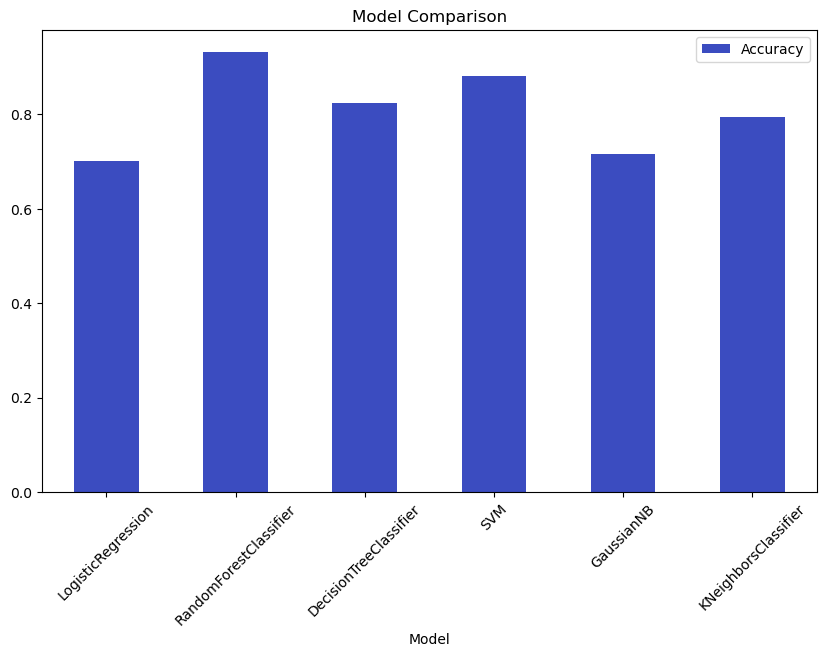

In [34]:
# Visualizing Model Performance
results_df.set_index("Model").plot(kind='bar', figsize=(10, 6), colormap='coolwarm', title="Model Comparison")
plt.xticks(rotation=45)
plt.show()

# Deployement Using Streamlit


In [35]:
import pickle

# Save the trained Random Forest model
model_filename = "random_forest_model.pkl"
with open(model_filename, "wb") as model_file:
    pickle.dump(model, model_file)

# Save the StandardScaler
scaler_filename = "scaler.pkl"
with open(scaler_filename, "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [36]:
import pickle

# Load the model
with open("random_forest_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Load the scaler
with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)


In [ ]:
import streamlit as st
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the trained model and scaler
model_path = "random_forest_model.pkl"  # Update with actual model path
scaler_path = "scaler.pkl"

with open(model_path, "rb") as model_file:
    model = pickle.load(model_file)
with open(scaler_path, "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

# Streamlit UI
st.title("Customer Churn Prediction")
st.write("Enter customer details to predict if they will churn or not.")

# Input fields based on dataset features
account_length = st.number_input("Account Length", min_value=0, max_value=300, value=100)
voice_mail_plan = st.selectbox("Voice Mail Plan", [0, 1])
voice_mail_messages = st.number_input("Voice Mail Messages", min_value=0, max_value=50, value=10)
day_mins = st.number_input("Day Minutes", min_value=0.0, max_value=400.0, value=200.0)
evening_mins = st.number_input("Evening Minutes", min_value=0.0, max_value=400.0, value=200.0)
night_mins = st.number_input("Night Minutes", min_value=0.0, max_value=400.0, value=200.0)
international_mins = st.number_input("International Minutes", min_value=0.0, max_value=50.0, value=10.0)
customer_service_calls = st.number_input("Customer Service Calls", min_value=0, max_value=10, value=1)
international_plan = st.selectbox("International Plan", [0, 1])
day_calls = st.number_input("Day Calls", min_value=0, max_value=200, value=100)
day_charge = st.number_input("Day Charge", min_value=0.0, max_value=50.0, value=20.0)
evening_calls = st.number_input("Evening Calls", min_value=0, max_value=200, value=100)
evening_charge = st.number_input("Evening Charge", min_value=0.0, max_value=50.0, value=15.0)
night_calls = st.number_input("Night Calls", min_value=0, max_value=200, value=100)
night_charge = st.number_input("Night Charge", min_value=0.0, max_value=50.0, value=10.0)
international_calls = st.number_input("International Calls", min_value=0, max_value=20, value=3)
international_charge = st.number_input("International Charge", min_value=0.0, max_value=10.0, value=2.0)
total_charge = st.number_input("Total Charge", min_value=0.0, max_value=100.0, value=50.0)

# Add the missing feature (Assuming it's 'area_code')
area_code = st.number_input("Area Code", min_value=0, max_value=999, value=415)

# Ensure correct number of features
features = np.array([[account_length, voice_mail_plan, voice_mail_messages, day_mins, 
                       evening_mins, night_mins, international_mins, customer_service_calls, 
                       international_plan, day_calls, day_charge, evening_calls, evening_charge, 
                       night_calls, night_charge, international_calls, international_charge, total_charge, 
                       area_code]])  # Now includes 19 features

# Prediction button
if st.button("Predict"):
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)
    result = "Churn" if prediction[0] == 1 else "Not Churn"
    
    # Special effect
    st.balloons()
    st.success(f"Prediction: {result}")
